In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display
import joblib

In [7]:
tracks = pd.read_csv("cleaned_data_f.csv")

features = tracks[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'valence', 'tempo']]
target = tracks['genre']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
model = RandomForestClassifier()
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(features, target)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [8]:
# Load the data
tracks = pd.read_csv("cleaned_data_f.csv")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using the Random Forest Classifier
model = RandomForestClassifier(n_estimators = 300, min_samples_split = 5)
model.fit(X_train_scaled, y_train)

# Evaluate the model
predictions = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=0))

Accuracy: 0.5010893246187363
Classification Report:
               precision    recall  f1-score   support

    alt-rock       0.41      0.43      0.42       173
   classical       0.90      0.85      0.88       157
     country       0.34      0.46      0.39       107
         edm       0.43      0.45      0.44       103
     hip-hop       0.53      0.63      0.57       123
        jazz       0.47      0.42      0.44        38
         pop       0.39      0.21      0.27        63
   punk-rock       0.42      0.40      0.41       124
        rock       1.00      0.03      0.06        30

    accuracy                           0.50       918
   macro avg       0.54      0.43      0.43       918
weighted avg       0.53      0.50      0.49       918



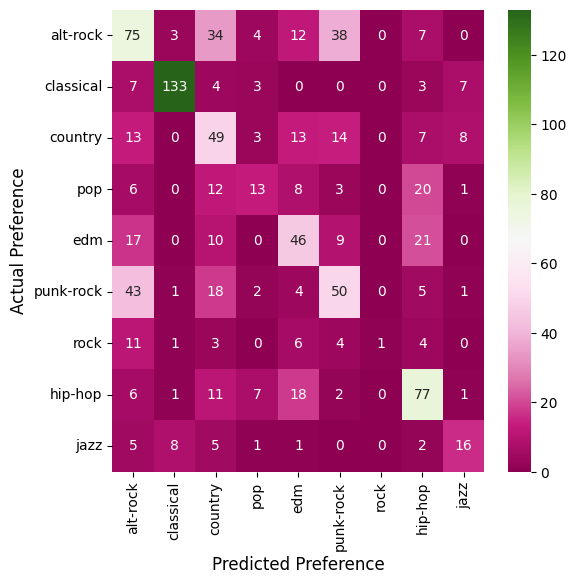

In [9]:
# Confusion matrix
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
#predicted genres
predicted = predictions
#actual genres in test set
actual = y_test
#creating confusion matrix
conf_matrix = metrics.confusion_matrix(actual, predicted, labels=['alt-rock','classical','country','pop','edm','punk-rock','rock','hip-hop','jazz'])
#visualizing confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='PiYG', xticklabels=['alt-rock','classical','country','pop','edm','punk-rock','rock','hip-hop','jazz'], yticklabels=['alt-rock','classical','country','pop','edm','punk-rock','rock','hip-hop','jazz'])
plt.xlabel('Predicted Preference', fontsize=12)
plt.ylabel('Actual Preference', fontsize=12)
plt.show()


In [10]:
# Using XGBoost
import xgboost as xgb

# Encode the target labels to numerical values
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using the XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=300, use_label_encoder=True, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)

# Evaluate the model
predictions = model.predict(X_test_scaled)

# Decode the predictions back to original labels
predictions_decoded = label_encoder.inverse_transform(predictions)
y_test_decoded = label_encoder.inverse_transform(y_test)

print("Accuracy:", accuracy_score(y_test_decoded, predictions_decoded))
print("Classification Report:\n", classification_report(y_test_decoded, predictions_decoded, zero_division=0))


Accuracy: 0.48474945533769065
Classification Report:
               precision    recall  f1-score   support

    alt-rock       0.37      0.40      0.38       173
   classical       0.88      0.86      0.87       157
     country       0.31      0.40      0.35       107
         edm       0.45      0.47      0.46       103
     hip-hop       0.54      0.57      0.55       123
        jazz       0.44      0.37      0.40        38
         pop       0.31      0.25      0.28        63
   punk-rock       0.41      0.40      0.40       124
        rock       0.50      0.03      0.06        30

    accuracy                           0.48       918
   macro avg       0.47      0.42      0.42       918
weighted avg       0.49      0.48      0.48       918



The False Positive, False Negative, True Positive and True Negative values can be found for each genre as follows:
TP = the cell where the actual and predicted value is the same genre
FN = the sum of values across the row for that genre, except for the true positive value
FP = the sum of the values down the column for that genre, except for the TP value
TN = the sum of values across the rows and columns except for the rows and columns of that genre